In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\train.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Fare"] = df["Fare"].fillna(df["Fare"].median())


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


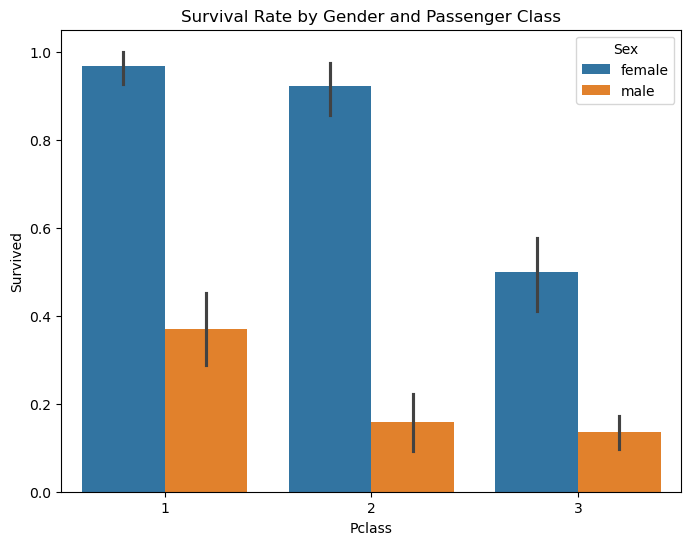

In [16]:
# Question 1: Gender & Class Survival Analysis
survival_rates = df.groupby(["Sex", "Pclass"])["Survived"].mean().unstack()
print(survival_rates)

plt.figure(figsize=(8, 6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Survival Rate by Gender and Passenger Class")
plt.show()

FamilyCategory
Alone           0.303538
Large Family    0.161290
Small Family    0.578767
Name: Survived, dtype: float64


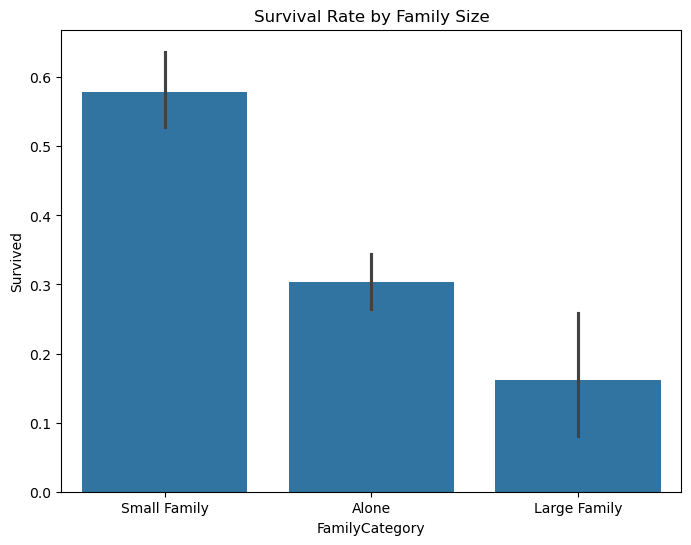

In [18]:
# Question 2: Family Size & Survival Analysis
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FamilyCategory"] = df["FamilySize"].apply(lambda x: "Alone" if x == 1 else "Small Family" if x <= 4 else "Large Family")

print(df.groupby("FamilyCategory")["Survived"].mean())

plt.figure(figsize=(8, 6))
sns.barplot(x="FamilyCategory", y="Survived", data=df)
plt.title("Survival Rate by Family Size")
plt.show()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


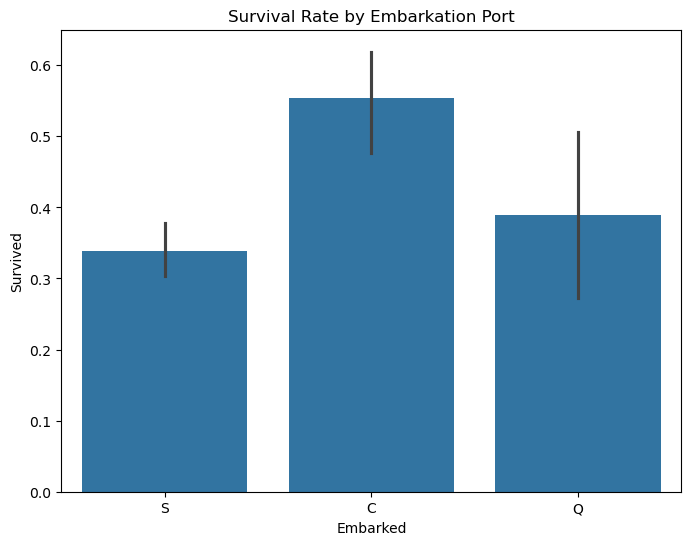

In [20]:
# Question 3: Embarkation Port & Survival Analysis
print(df.groupby("Embarked")["Survived"].mean())

plt.figure(figsize=(8, 6))
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Embarkation Port")
plt.show()

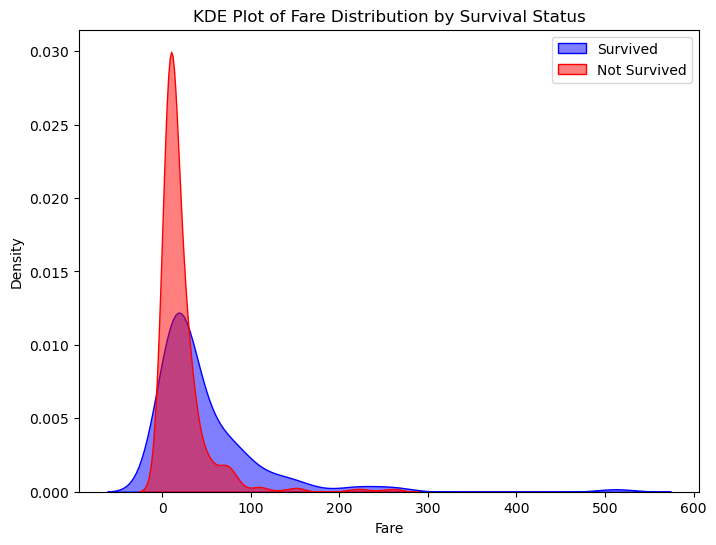

In [34]:
# Bonus Question: Fare Analysis
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df["Survived"] == 1]["Fare"], fill=True, color="blue", label="Survived", alpha=0.5)
sns.kdeplot(df[df["Survived"] == 0]["Fare"], fill=True, color="red", label="Not Survived", alpha=0.5)
plt.title("KDE Plot of Fare Distribution by Survival Status")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.show()


In [38]:
# Conclusion
print("Key Findings:\n")
print("1. Women had a significantly higher survival rate compared to men, especially in 1st class.")
print("2. Passengers traveling alone had lower survival rates than those with family members.")
print("3. Passengers who embarked from port C had a slightly higher survival rate.")
print("4. Higher fare-paying passengers had better chances of survival.")

Key Findings:

1. Women had a significantly higher survival rate compared to men, especially in 1st class.
2. Passengers traveling alone had lower survival rates than those with family members.
3. Passengers who embarked from port C had a slightly higher survival rate.
4. Higher fare-paying passengers had better chances of survival.
